# Metrics on scikit-learn github repo

In [141]:
import json
import datetime
import numpy as np
import pandas as pd

In [142]:
with open("../data/issues.json") as f:
    istr = f.read()
istr

'{\n  "data": {\n    "repository": {\n      "issues": {\n        "edges": [\n          {\n            "node": {\n              "number": 15646,\n              "createdAt": "2019-11-18T08:53:03Z",\n              "closedAt": null,\n              "author": {\n                "login": "zeionara"\n              }\n            }\n          },\n          {\n            "node": {\n              "number": 15647,\n              "createdAt": "2019-11-18T09:35:57Z",\n              "closedAt": null,\n              "author": {\n                "login": "dupuisIRT"\n              }\n            }\n          },\n          {\n            "node": {\n              "number": 15649,\n              "createdAt": "2019-11-18T10:58:19Z",\n              "closedAt": null,\n              "author": {\n                "login": "akhiadber"\n              }\n            }\n          },\n          {\n            "node": {\n              "number": 15651,\n              "createdAt": "2019-11-18T14:57:43Z",\n            

In [149]:
ijson = json.loads(istr)
ilist = ijson["data"]["repository"]["issues"]["edges"]
ntot = len(ilist)

In [150]:
creatDate = [ ilist[i]["node"]["createdAt"] for i in range(0, ntot) ]
closDate = [ ilist[i]["node"]["closedAt"] for i in range(0, ntot) ]
number = [ ilist[i]["node"]["number"] for i in range(0, ntot) ]
author = [ ilist[i]["node"]["author"]["login"] for i in range(0, ntot) ]

In [151]:
from datetime import datetime
from datetime import timedelta

crdate = []
cldate = []
duration = []
delta = timedelta(hours=1)

for i in range(0, ntot):
    crdate.append(pd.to_datetime(creatDate[i], format='%Y-%m-%dT%H:%M:%SZ'))
    cldate.append(pd.to_datetime(closDate[i], format='%Y-%m-%dT%H:%M:%SZ'))
    if closDate[i] != None:
        duration.append(pd.Timedelta.to_pytimedelta(cldate[i] - crdate[i]) / delta )
    else:
        duration.append(None)

In [152]:
idata = { "Number" : number, "CreatedAt" : crdate, "ClosedAt" : cldate, "Duration" : duration, "Author" : author }
idf = pd.DataFrame(prdata)

In [153]:
idf.head()

,Number,CreatedAt,ClosedAt,Duration,Author
0,15646,2019-11-18 08:53:03,NaT,NaN,zeionara
1,15647,2019-11-18 09:35:57,NaT,NaN,dupuisIRT
2,15649,2019-11-18 10:58:19,NaT,NaN,akhiadber
3,15651,2019-11-18 14:57:43,NaT,NaN,glemaitre
4,15653,2019-11-18 15:47:25,2019-11-19 13:25:12,21.629722,adrinjalali


In [154]:
import pandas_profiling
idf.profile_report()

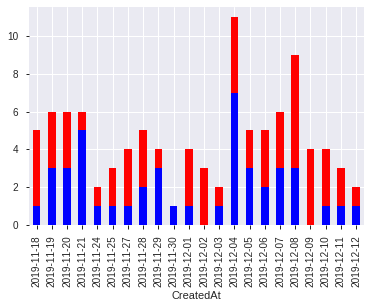

In [167]:
gidf = idf.groupby([idf['CreatedAt'].dt.to_period('D')]).count().unstack()
gidf['CreatedAt'].plot(kind='bar', color='red')
gidf['ClosedAt'].plot(kind='bar', color='blue')